In [220]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.constants as aconst
from pycbc.filter import make_frequency_series
from calcwf import *

We can investigate eccentric harmonics in TEOBResumS using a qtransform.

(5.0, 60.0)

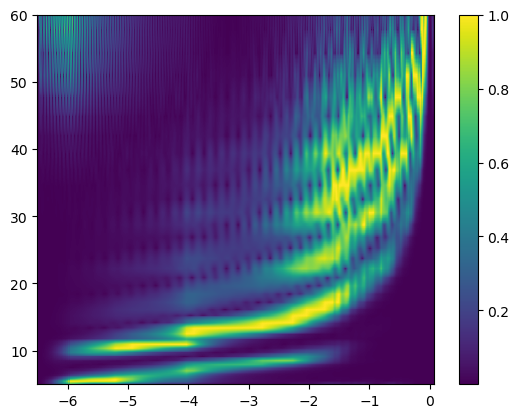

In [235]:
# Gen wf and qtransform
h = gen_wf(10, 0.1, chirp2total(24,2), 2, 4096*4, 'TEOBResumS')
h_q_times, h_q_freqs, h_q_plane = h.real().qtransform(.001, logfsteps=1000, qrange=(16,16), frange=(5, 200))
h_q_amp = h_q_plane**0.5

# Normalise amplitude at each time
h_q_amp /= np.max(h_q_amp, axis=0)

# Make plot
plt.pcolormesh(h_q_times, h_q_freqs, h_q_amp)
plt.colorbar()
plt.xlim()
plt.ylim(5,60)

In [27]:
# Gets orbital frequency from gravitational wave frequency
def f_orb(f_gw):
    return f_gw/2

# Gets apsidal advance frequency from gravitational wave frequency
def f_peri(f_gw):
    P_orb = 2/f_gw
    e = shifted_e(f_gw, f_low, ecc)
    peri_advance_per_orb = peri_advance_orbit(P_orb, e, M*aconst.M_sun.value)
    P_peri = P_orb*2*np.pi/peri_advance_per_orb
    return 1/P_peri

In [194]:
# Parameters
harmonics = np.arange(5)
ecc = 0.1 # defined at f_low
M = chirp2total(24, 2)
f_low = 10
f_high = 50
fs = np.linspace(f_low, f_high, 1001)

In [195]:
# Get how many multiples of f_peri for harmonic k
def f_peri_multiple(k):
    if k < 5:
        return int((k+1)/2)*(2*(k%2)-1)
    else:
        return k-2

# Draw frequency evolution of harmonics
def plot_f_harms(ax, ks, f_gws):

    # Get component of frequencies
    f_orbs = f_orb(f_gws)
    f_peris = f_peri(f_gws)

    # Add and plot frequencies for each harmonic
    for k in ks:
        peri_mult = f_peri_multiple(k)
        f_harms = 2*f_orbs + peri_mult*f_peris
        ax.plot(f_gws, f_harms/f_orbs, label=f'h{k}')

# Plots a dashed line at every integer on the y axis
def plot_int_lines(ax, n):
    if n < 5:
        n = 5
    ints = np.arange(1, n)
    for y_pos in ints:
        plt.axhline(y_pos, c='k', ls='dashed', alpha=0.5, zorder=-1)

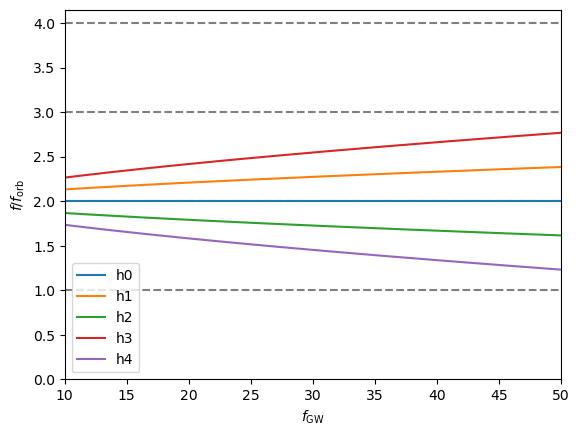

In [196]:
# Make plot
plot_f_harms(plt.gca(), harmonics, fs)
plot_int_lines(plt.gca(), len(harmonics))
plt.xlabel('$f_\mathrm{GW}$')
plt.ylabel('$f$/$f_\mathrm{orb}$')
plt.xlim(f_low, f_high)
plt.ylim(0,)
plt.legend()

In [125]:
h = gen_wf(5, 0.1, chirp2total(10,2), 2, 1024, 'TEOBResumS')
h_f = make_frequency_series(h.real()[0:1024*8])
_, h0, h1, h2, h3, _, _, _, _ = get_h([1,1,1,1], 5, 0.1, chirp2total(10,2), 2, 1024)
h1_f = make_frequency_series(h1.real()[0:1024*8])

(0.0, 15.0)

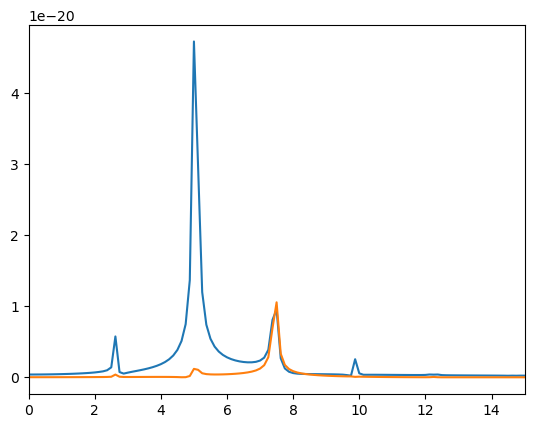

In [185]:
plt.plot(h_f.sample_frequencies, abs(h_f))
plt.plot(h1_f.sample_frequencies, abs(h1_f))
plt.xlim(0, 15)

(12.0, 20.0)

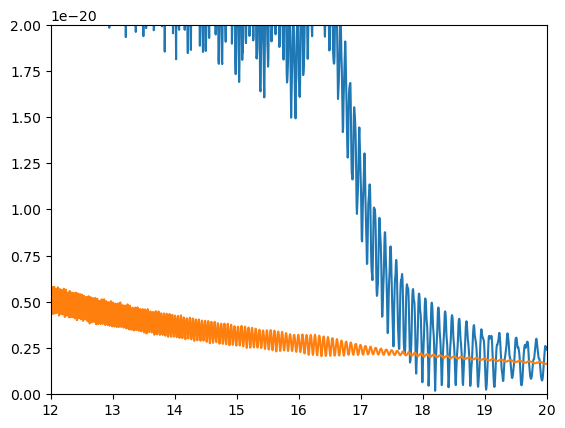

In [175]:
h_f_full = make_frequency_series(h.real()[0:int(1024*180)])
plt.plot(h_f_full.sample_frequencies, abs(h_f_full))
h1_f_full = make_frequency_series(h1.real()[0:int(1024*180)])
plt.plot(h1_f_full.sample_frequencies, abs(h1_f_full))
plt.ylim(0,2e-20)
plt.xlim(12, 20)

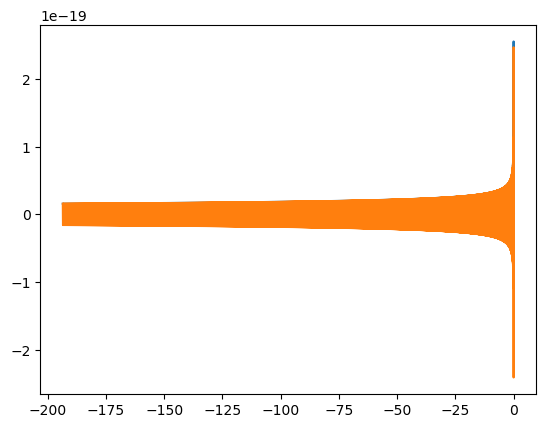

In [190]:
h_ = gen_wf(5, 0, chirp2total(10,2), 2, 1024, 'TEOBResumS')
plt.plot(h_.sample_times, abs(h_))
plt.plot(h_.sample_times, h_)

(0.0, 15.0)

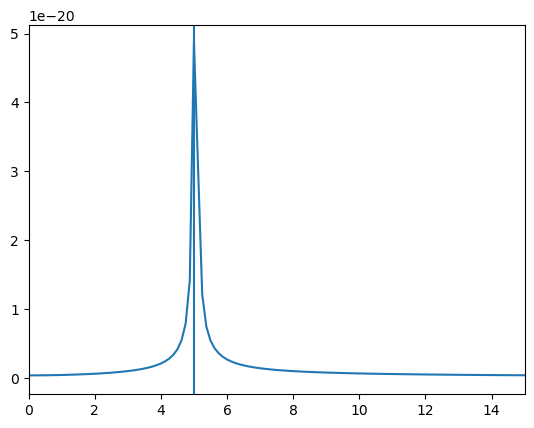

In [193]:
h__f = make_frequency_series(h_.real()[0:1024*8])
plt.plot(h__f.sample_frequencies, abs(h__f))
plt.axvline(5)
plt.xlim(0,15)

In [129]:
h.sample_times[0]

-187.095703125